In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from pandas_datareader import data, wb

In [4]:
from statsmodels.tsa.api import adfuller

In [5]:
# setting start and end dates
start='2014-01-01'
end='2016-01-01'

In [6]:
# importing Walmart and Target using pandas datareader
wmt = pdr.get_data_yahoo('WMT',start,end)
tgt = pdr.get_data_yahoo('TGT',start,end)

In [9]:
# Creating a figure to plot on
plt.figure(figsize = (20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

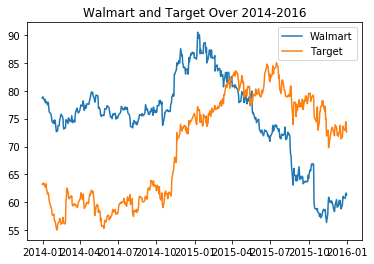

In [10]:
# Creating WMT and TGT plots
plt.plot(wmt["Close"],label = 'Walmart')

plt.plot(tgt["Close"],label = 'Target')
plt.title('Walmart and Target Over 2014-2016')

plt.legend(loc = 0)
plt.show()

In [11]:
# initializing newDF as a pandas dataframe
newDF = pd.DataFrame()
# adding WMT closing prices as a column to the newDF
newDF['WMT'] = wmt['Close']
# adding TGT closing prices as a column to the newDF
newDF['TGT'] = tgt['Close']

In [12]:
newDF.head()

,WMT,TGT
Date,,
2013-12-31,78.690002,63.270000
2014-01-02,78.910004,63.180000
2014-01-03,78.650002,63.490002
2014-01-06,78.209999,63.060001
2014-01-07,78.449997,62.910000


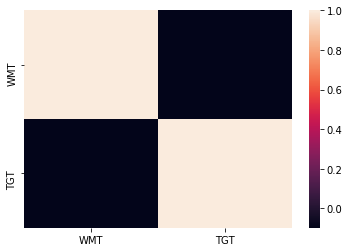

In [13]:
# using seaborn as sns to create a correlation heatmap of WMT and TGT
sns.heatmap(newDF.corr())

No handles with labels found to put in legend.


<Figure size 1800x720 with 0 Axes>

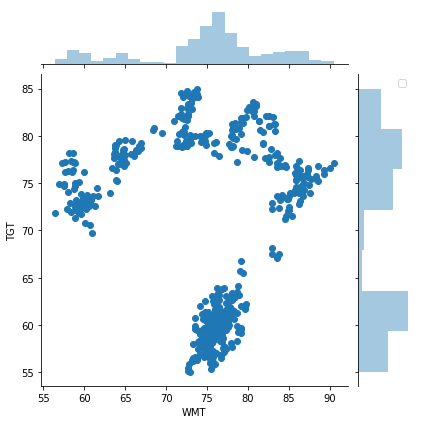

In [26]:
# Creating a scatter plot using Seaborn
plt.figure(figsize = (25,10))
sns.jointplot(newDF['WMT'],newDF['TGT'])
plt.legend(loc = 0)
plt.show()

In [15]:
# adding the spread column to the nemDF dataframe
newDF['Spread'] = newDF['WMT'] - newDF['TGT']

In [16]:
# instantiating the adfuller test
adf = adfuller(newDF['Spread'])

In [17]:
# Logic that states if our test statistic is less than
# a specific critical value, then the pair is cointegrated at that
# level, else the pair is not cointegrated

if adf[0] < adf[4]['1%']:
    print('Spread is Cointegrated at 1% Significance Level')
elif adf[0] < adf[4]['5%']:
    print('Spread is Cointegrated at 5% Significance Level')
elif adf[0] < adf[4]['10%']:
    print('Spread is Cointegrated at 10% Significance Level')
else:
    print('Spread is not Cointegrated')

Spread is not Cointegrated


In [18]:
# printing out the results of the adf test
adf

(-0.37074017085568345,
 0.914870690564098,
 0,
 504,
 {'1%': -3.443391504492468,
  '5%': -2.8672917032172953,
  '10%': -2.5698334393109095},
 1192.2511332000245)

In [20]:
# importing dltr and dg
dltr = pdr.get_data_yahoo('DLTR',start, end)
dg = pdr.get_data_yahoo('DG',start, end)

In [21]:
# adding dltr and dg to our newDF dataframe
newDF['DLTR'] = dltr['Close']
newDF['DG'] = dg['Close']

# creating the dltr and dg spread as a column in our newDF dataframe
newDF['Spread_2'] = newDF['DLTR'] - newDF['DG']

In [22]:
newDF.head()

,WMT,TGT,Spread,DLTR,DG,Spread_2
Date,,,,,,
2013-12-31,78.690002,63.270000,15.420002,56.419998,60.320000,-3.900002
2014-01-02,78.910004,63.180000,15.730003,56.400002,61.200001,-4.799999
2014-01-03,78.650002,63.490002,15.160000,56.570000,60.980000,-4.410000
2014-01-06,78.209999,63.060001,15.149998,56.759998,59.610001,-2.850002
2014-01-07,78.449997,62.910000,15.539997,56.590000,59.889999,-3.299999


In [23]:
# Creating another adfuller instance
adf2 = adfuller(newDF['Spread_2'])

In [24]:
if adf2[0] < adf2[4]['1%']:
    print('Spread is Cointegrated at 1% Significance Level')
elif adf2[0] < adf2[4]['5%']:
    print('Spread is Cointegrated at 5% Significance Level')
elif adf2[0] < adf2[4]['10%']:
    print('Spread is Cointegrated at 10% Significance Level')
else:
    print('Spread is not Cointegrated')

Spread is not Cointegrated


In [25]:
adf2

(-1.9737751046928573,
 0.29818883456109735,
 1,
 503,
 {'1%': -3.4434175660489905,
  '5%': -2.8673031724657454,
  '10%': -2.5698395516760275},
 1307.1341866938062)